In [66]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Hypothesis Testing And Goodness of Fit
Hypothesis testing and $\chi^2$ statistics tests quantify the validity and 'goodness of fit', respectively. Again a thorough treatment of the $\chi^2$ statistic is presented in chapters 5 and 8 of 'Measurements and Their Uncertainties'{cite}`Hughes_Hase`. The statistic is defined as,  
$$
\chi^2 = \sum_{i=0}^N\left(\frac{y'(\vec{x_i},\vec{p})-y(\vec{x_i})}{\alpha_i}\right)^2.
$$
If each value in the residual sum is treated as an independent random variable. Then the sum of the values is distributed according to, 
$$
X(\chi^2:\nu) = \frac{(\chi^2)^{\frac{\nu}{2} - 1}exp(-\chi^2/2)}{2^{\nu/2}\Gamma(\nu/2)}.
$$
Both the pfd and cdf are plotted below left and right respectively. The parameter $\nu = N - m$, where N and m are the number of datapoints and parameters respectively. 

The cdf(cumulative distribution function) quantifies the probability that the residuals are larger for a specific model with a $\chi^2$, $P(\chi^2 \geq \chi^2_{min};\nu)$. A good fit is indicated by a value close too one. Bearing in mind that the $\chi^2$ considers the size of the errors present. A large value for $P(\chi^2 \geq \chi^2_{min};\nu)$ can be an indication of overly large error. 

## Hypothesis Testing
Hypothesis testing provides a systematic framework for deciding if a model fits set of data. The process for the Pearson $\chi^2$ test is as follows. 

Given a null hypothesis $\matcal{H}_0
1. Determine the $chi^2$ value for the data 
2. Determine $\nu$
3. Select a confidence level and calculate $\chi^2_{crit}$ 
4. Compare The Value of $\chi^2_{min}$ with $\chi^2_{crit}$
5. Reject $\mathcal{H}_0$ if $\chi^2_{min} \geq \chi^2_{crit}$



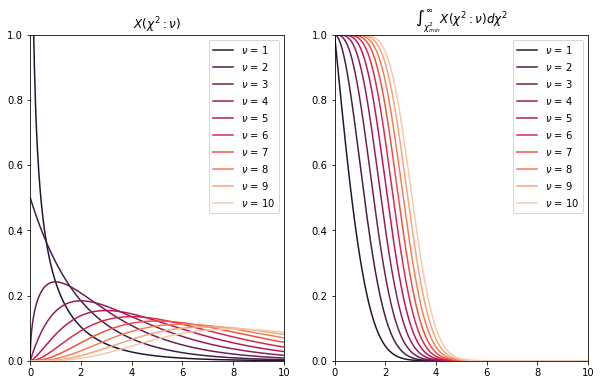

In [63]:
x = np.linspace(0, 10, 1000)
#Plotting
fig, ax  = plt.subplots(1, 2, figsize = (10,6))
for spt, _ in enumerate(ax):    
    ax[spt].set_prop_cycle(color = sns.color_palette("rocket",10))
for i in range(10):
    pdf = stats.chi2.pdf(x, 1+i)
    cdf = stats.chi.cdf(x, 1+i)
    ax[0].plot(x, pdf, label = r'$\nu$' +f' = {i+1}')
    ax[1].plot(x, 1-cdf,label = r'$\nu$' +f' = {i+1}')
for spt, _ in enumerate(ax):
    ax[spt].legend()
    ax[spt].set_ylim(0, 1)
    ax[spt].set_xlim(0, 10)
ax[0].set_title(r'$ X(\chi^2:\nu) $')
ax[1].set_title(r'$ \int_{\chi^2_{min}}^\infty X(\chi^2:\nu) d \chi^2 $')
None

## Implementing $\chi^2$ testing in $CO_2$ data

In [67]:
path_global = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv'
co2_data_global = pd.read_csv(path_global, header=0, comment='#')
path_ml =  'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'              
co2_data_ml = pd.read_csv(path_ml, header=0, comment='#')
co2_data_ml = co2_data_ml[co2_data_ml['sdev']>0] 

In [69]:
def p3(x, a_0, a_1, a_2, a_3):
    return a_0 + a_1*x + a_2*x**2 + a_3*x**3 

def p1(x, a_0, a_1):
    return a_0 + a_1*x
# Fit Coefs
##Unweighted Least Squares Global
p1_global_fit, p1_global_error = scipy.optimize.curve_fit(p1,
    co2_data_global['decimal'],
    co2_data_global['average']
    )

p3_global_fit, p3_global_error = scipy.optimize.curve_fit(p3,
    co2_data_global['decimal'],
    co2_data_global['average']
    )
# Weighted Least Squares Mauna Loa 
p1_ml_fit, p1_ml_error = scipy.optimize.curve_fit(p1,
    co2_data_ml['decimal date'],
    co2_data_ml['average'],
    sigma = co2_data_ml['sdev']
    )

p3_ml_fit, p3_ml_error = scipy.optimize.curve_fit(p3,
    co2_data_ml['decimal date'],
    co2_data_ml['average'],
    sigma = co2_data_ml['sdev']
    )